In [451]:
import numpy as np
import seaborn as sns
import pandas as pd
import polars as pl
from functions.eda import *
from functions.cat_eda import *
from functions.num_eda import *

In [452]:
data=pl.read_csv("CarPrice_Assignment.csv").drop(["car_ID","symboling","CarName"])
data.head()

fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
str,str,str,str,str,str,f64,f64,f64,f64,i64,str,str,i64,str,f64,f64,f64,i64,i64,i64,i64,f64
"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,13495.0
"""gas""","""std""","""two""","""convertible""","""rwd""","""front""",88.6,168.8,64.1,48.8,2548,"""dohc""","""four""",130,"""mpfi""",3.47,2.68,9.0,111,5000,21,27,16500.0
"""gas""","""std""","""two""","""hatchback""","""rwd""","""front""",94.5,171.2,65.5,52.4,2823,"""ohcv""","""six""",152,"""mpfi""",2.68,3.47,9.0,154,5000,19,26,16500.0
"""gas""","""std""","""four""","""sedan""","""fwd""","""front""",99.8,176.6,66.2,54.3,2337,"""ohc""","""four""",109,"""mpfi""",3.19,3.4,10.0,102,5500,24,30,13950.0
"""gas""","""std""","""four""","""sedan""","""4wd""","""front""",99.4,176.6,66.4,54.3,2824,"""ohc""","""five""",136,"""mpfi""",3.19,3.4,8.0,115,5500,18,22,17450.0


Check for Linearity between independent variables and dependent variable

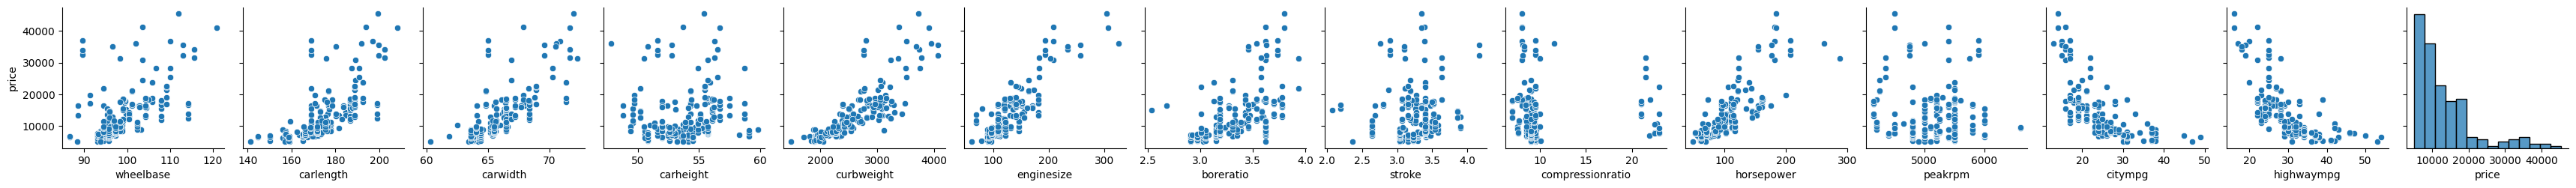

In [453]:
sns.pairplot(data.to_pandas(),y_vars=["price"])

Missing Values

In [454]:
data.null_count().sum()

fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


No missing

In [455]:
cat_cols=[col for col in data.columns if data[col].dtype== pl.String]
num_cols=[col for col in data.columns if data[col].dtype!= pl.String]

Categorical EDA

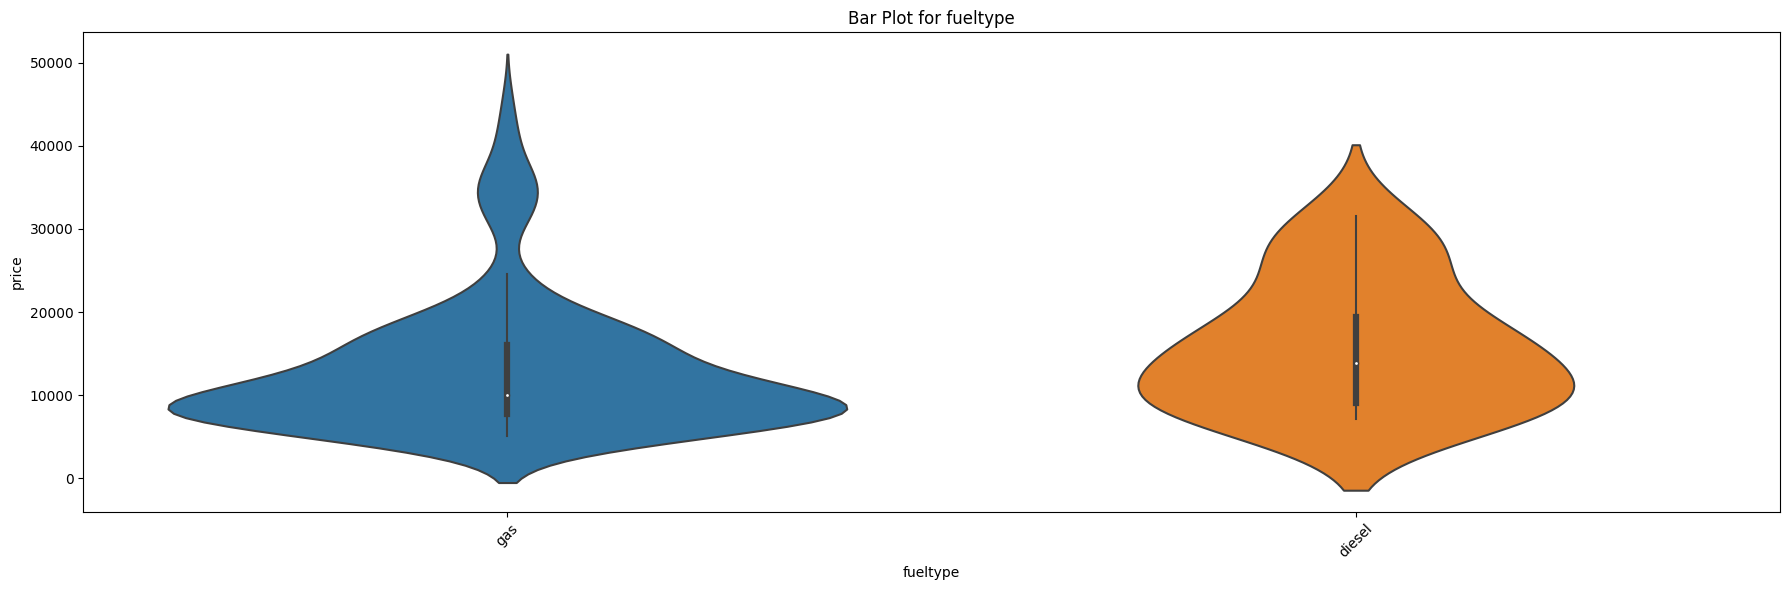

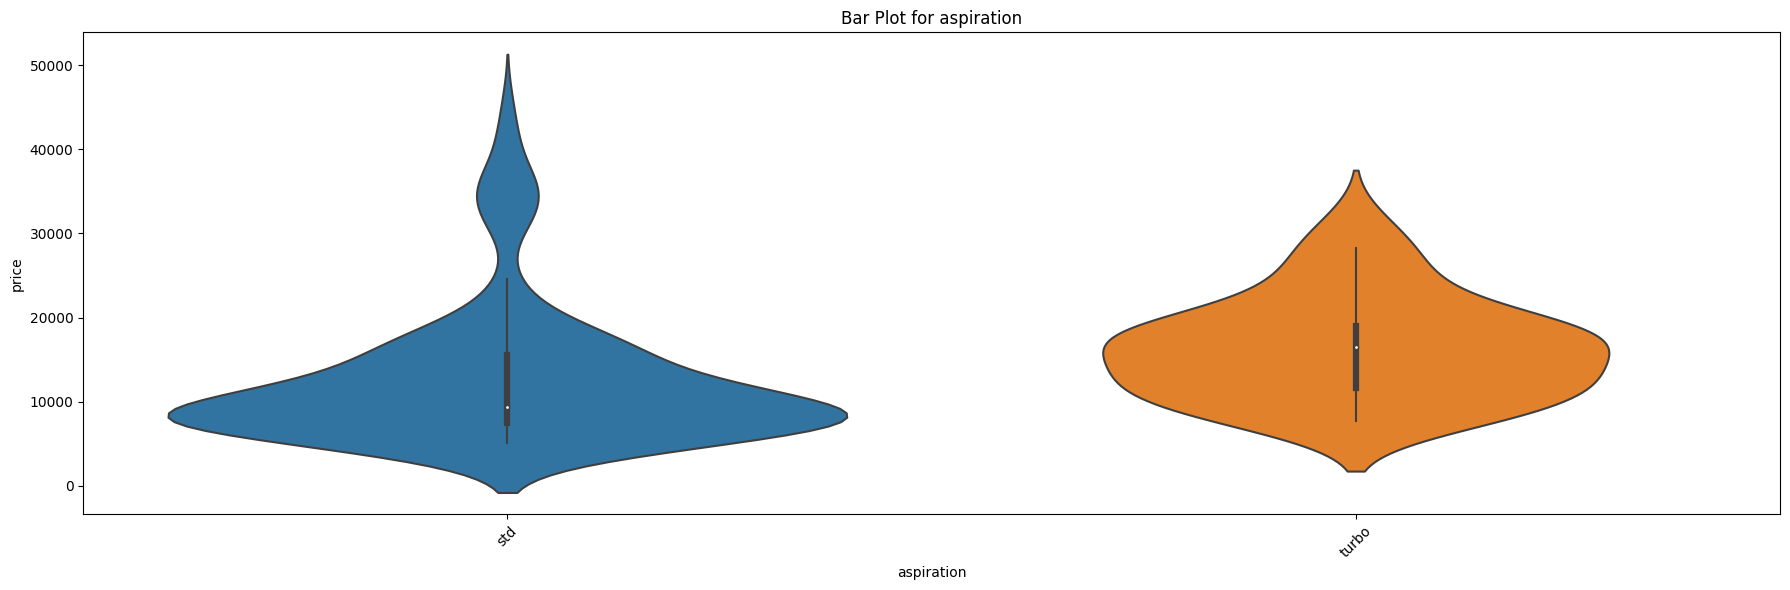

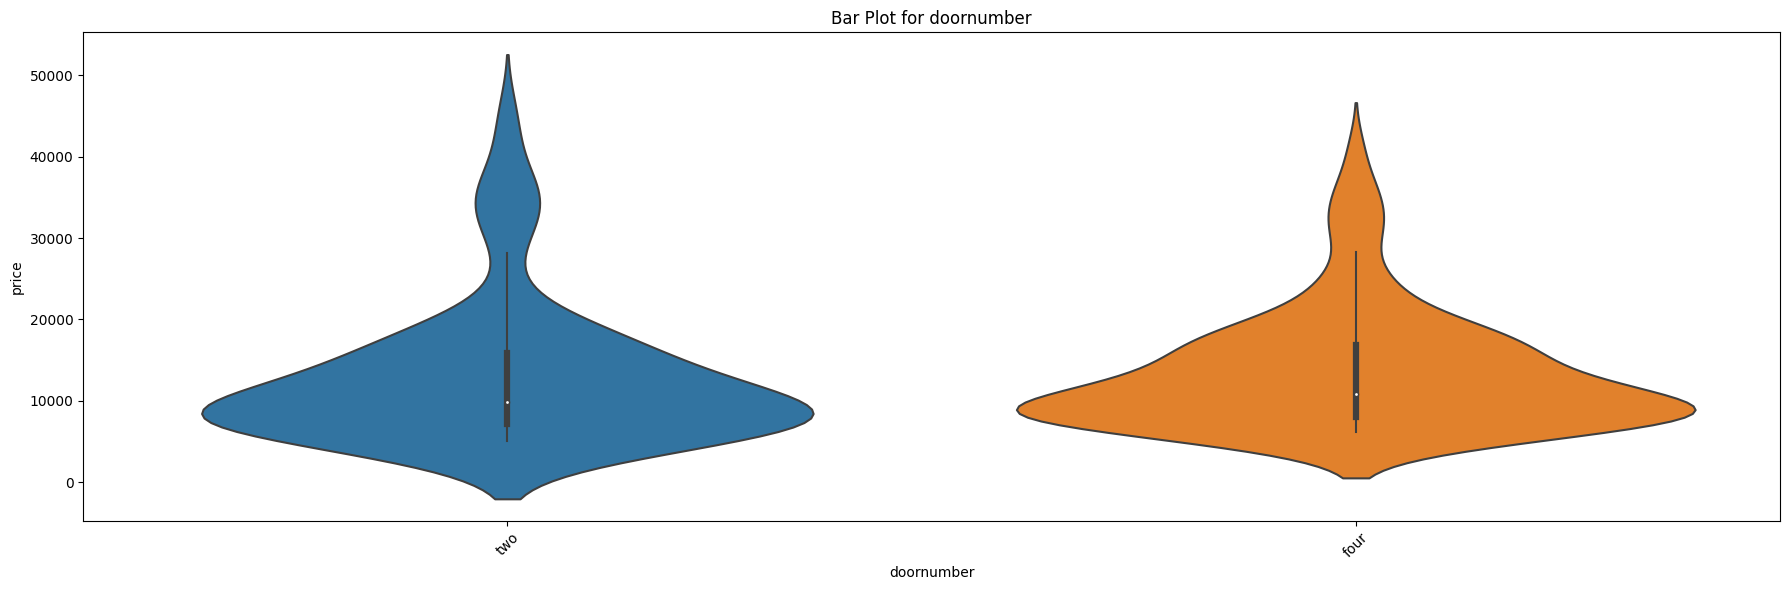

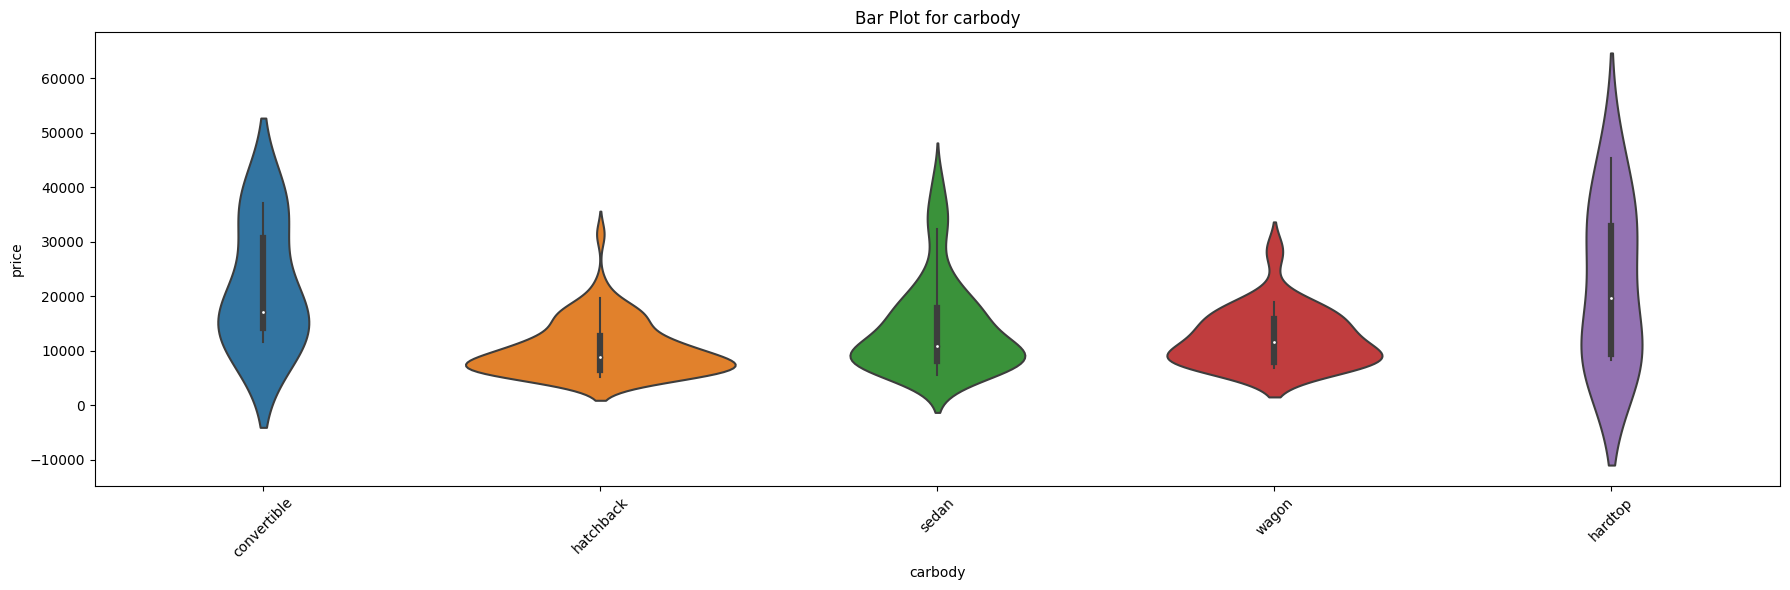

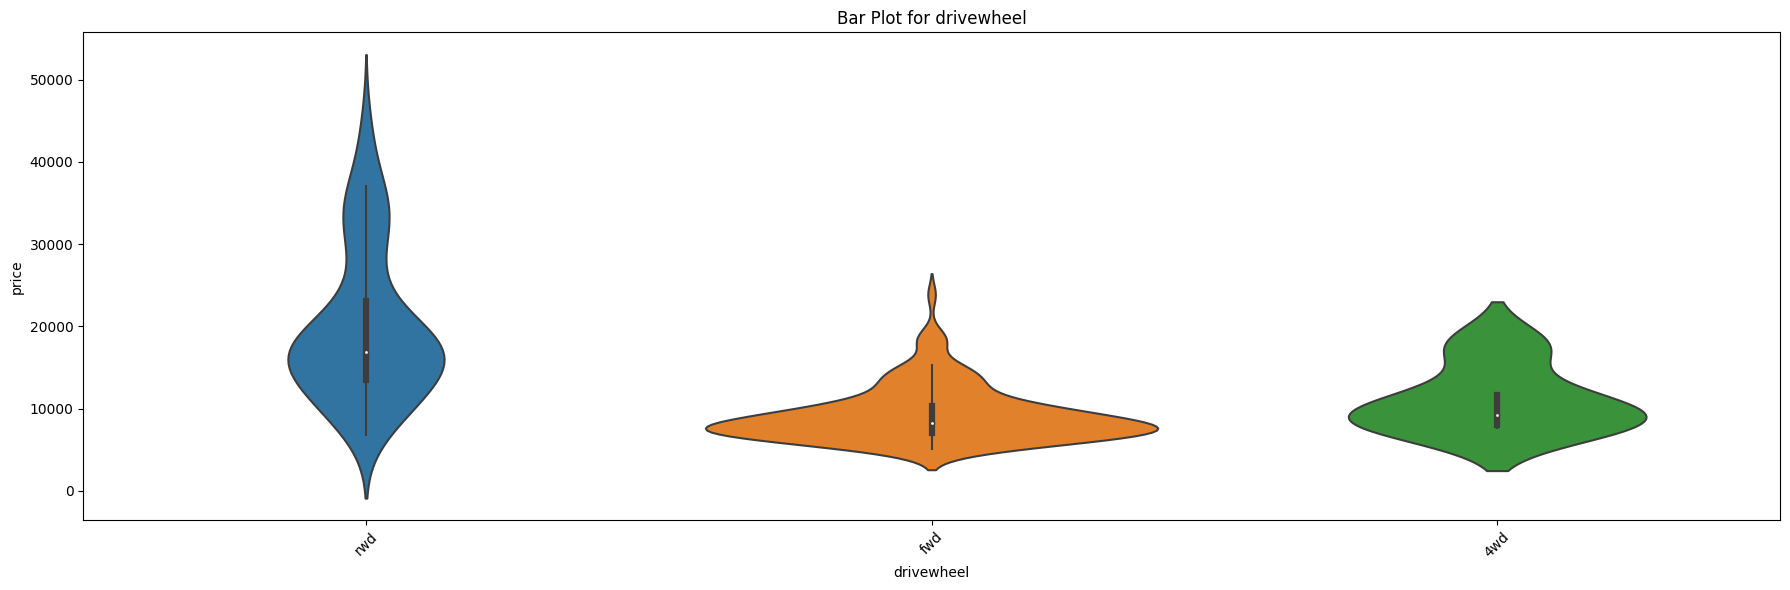

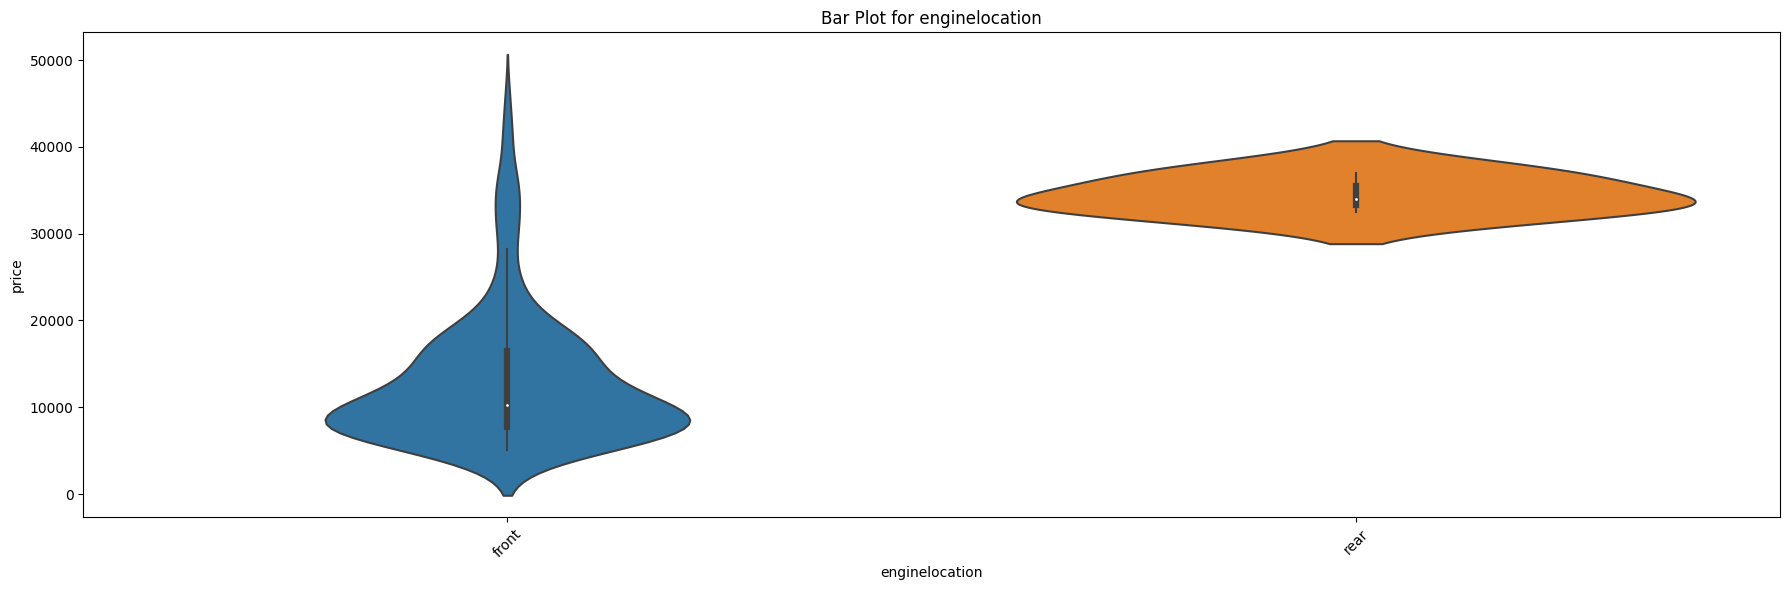

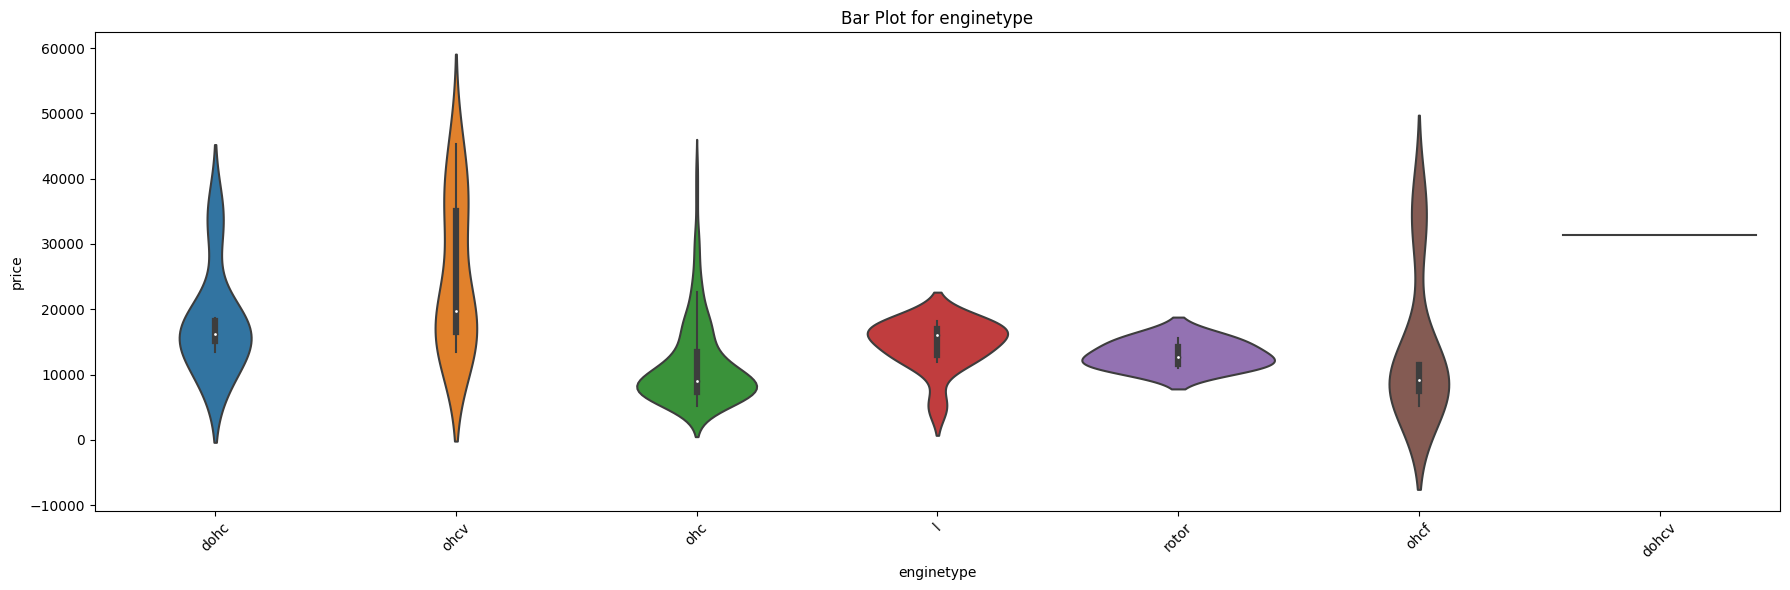

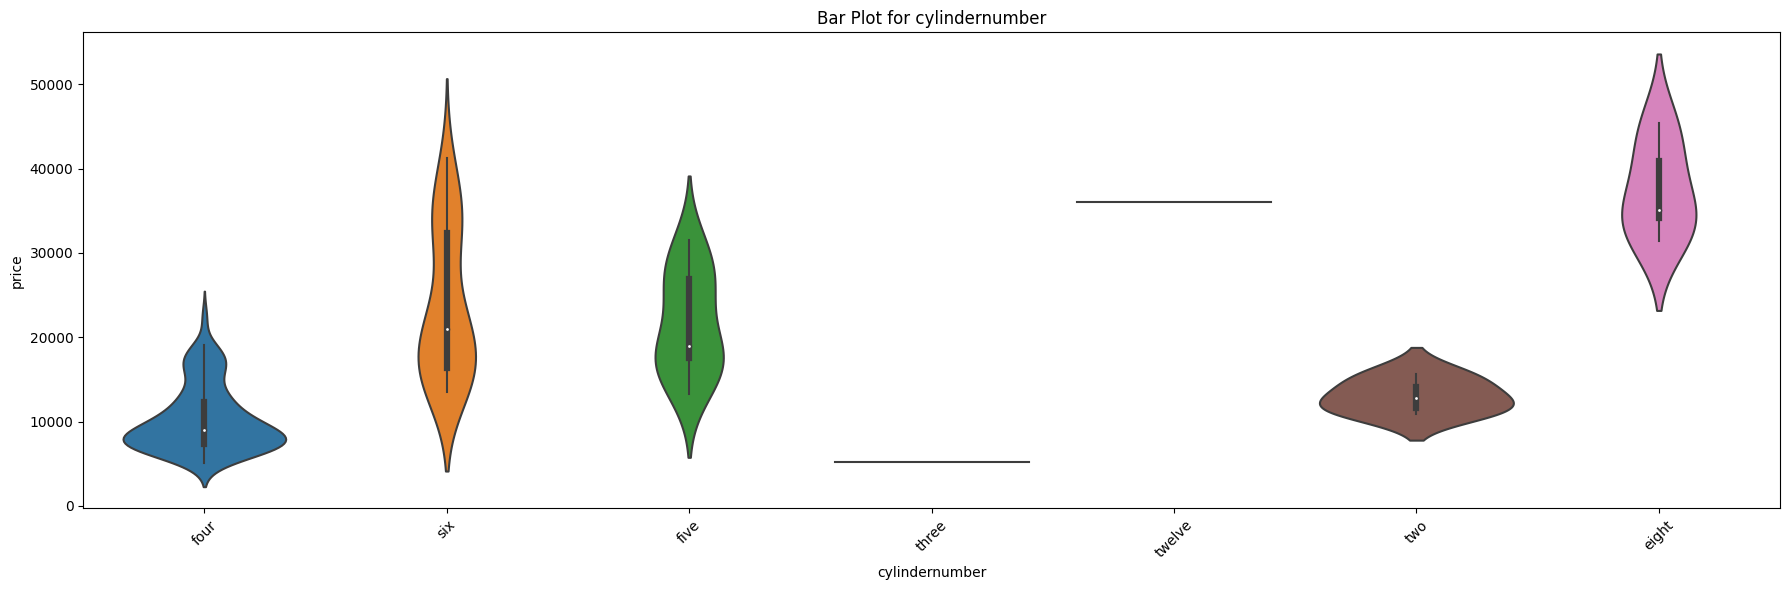

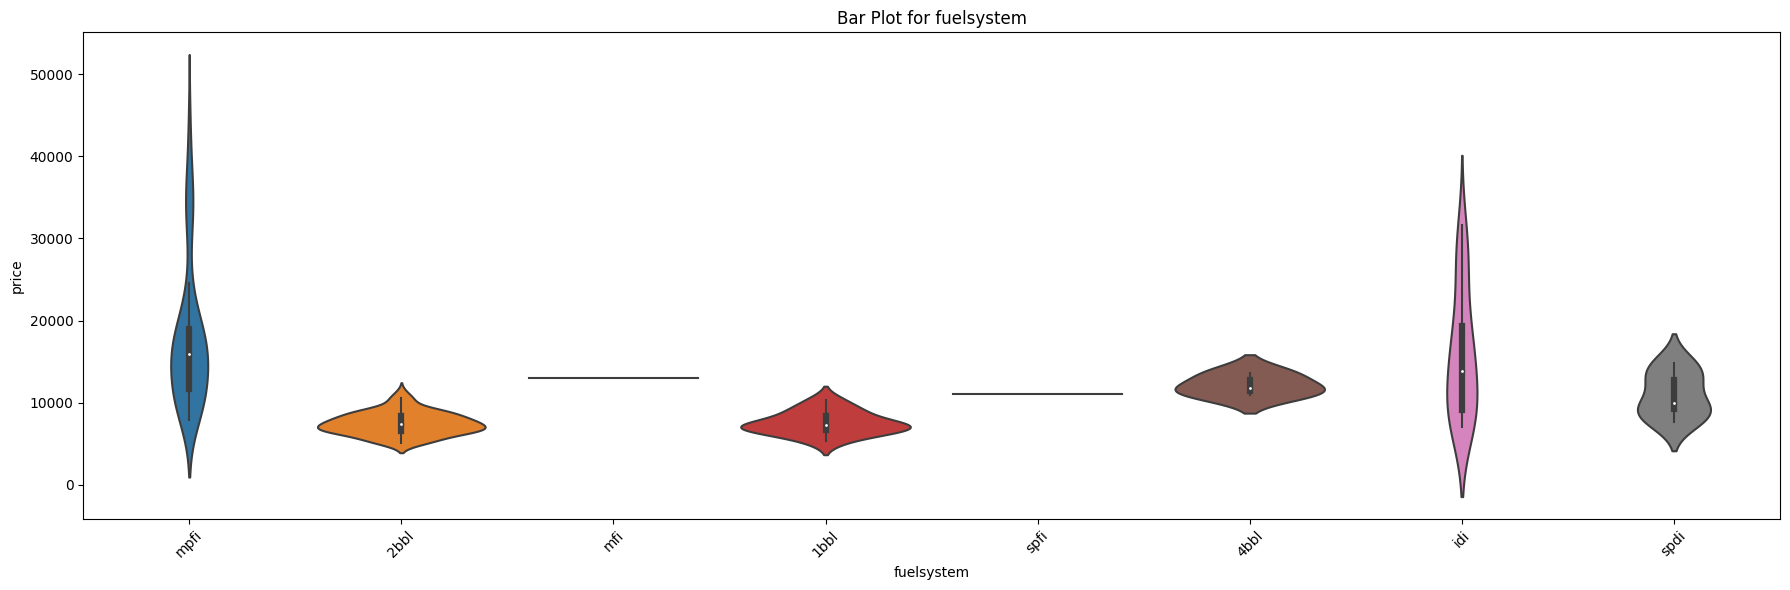

In [456]:
categorical_violin_plot(data.to_pandas(),cat_cols,"price")

In [457]:
# data=data.with_columns(data["carbody"].str.replace_many(["convertible","hardtop","hatchback","sedan","wagon"],["2","2","0","1","0"] ).cast(pl.Int64))
data=data.with_columns(data["drivewheel"].str.replace_many(["rwd","fwd","4wd"],["1","0","0"]).cast(pl.Int64))
data=data.with_columns(data["enginelocation"].str.replace_many(["front","rear"],["0","1"]).cast(pl.Int64))
data=data.with_columns(data["cylindernumber"].str.replace_many(["two","three","four","five","six","eight","twelve"],["2","3","4","5","6","8","12"]).cast(pl.Int64))
data=data.with_columns(data["fuelsystem"].is_in(["mpfi","idi"]).cast(pl.Int64))
data=data.drop(["carbody","enginetype","fueltype","aspiration","doornumber"])

In [458]:
cat_cols=[col for  col in cat_cols if col not in ["carbody","enginetype","fueltype","aspiration","doornumber"]]

In [459]:
data

drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
i64,i64,f64,f64,f64,f64,i64,i64,i64,i64,f64,f64,f64,i64,i64,i64,i64,f64
1,0,88.6,168.8,64.1,48.8,2548,4,130,1,3.47,2.68,9.0,111,5000,21,27,13495.0
1,0,88.6,168.8,64.1,48.8,2548,4,130,1,3.47,2.68,9.0,111,5000,21,27,16500.0
1,0,94.5,171.2,65.5,52.4,2823,6,152,1,2.68,3.47,9.0,154,5000,19,26,16500.0
0,0,99.8,176.6,66.2,54.3,2337,4,109,1,3.19,3.4,10.0,102,5500,24,30,13950.0
0,0,99.4,176.6,66.4,54.3,2824,5,136,1,3.19,3.4,8.0,115,5500,18,22,17450.0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1,0,109.1,188.8,68.9,55.5,2952,4,141,1,3.78,3.15,9.5,114,5400,23,28,16845.0
1,0,109.1,188.8,68.8,55.5,3049,4,141,1,3.78,3.15,8.7,160,5300,19,25,19045.0
1,0,109.1,188.8,68.9,55.5,3012,6,173,1,3.58,2.87,8.8,134,5500,18,23,21485.0


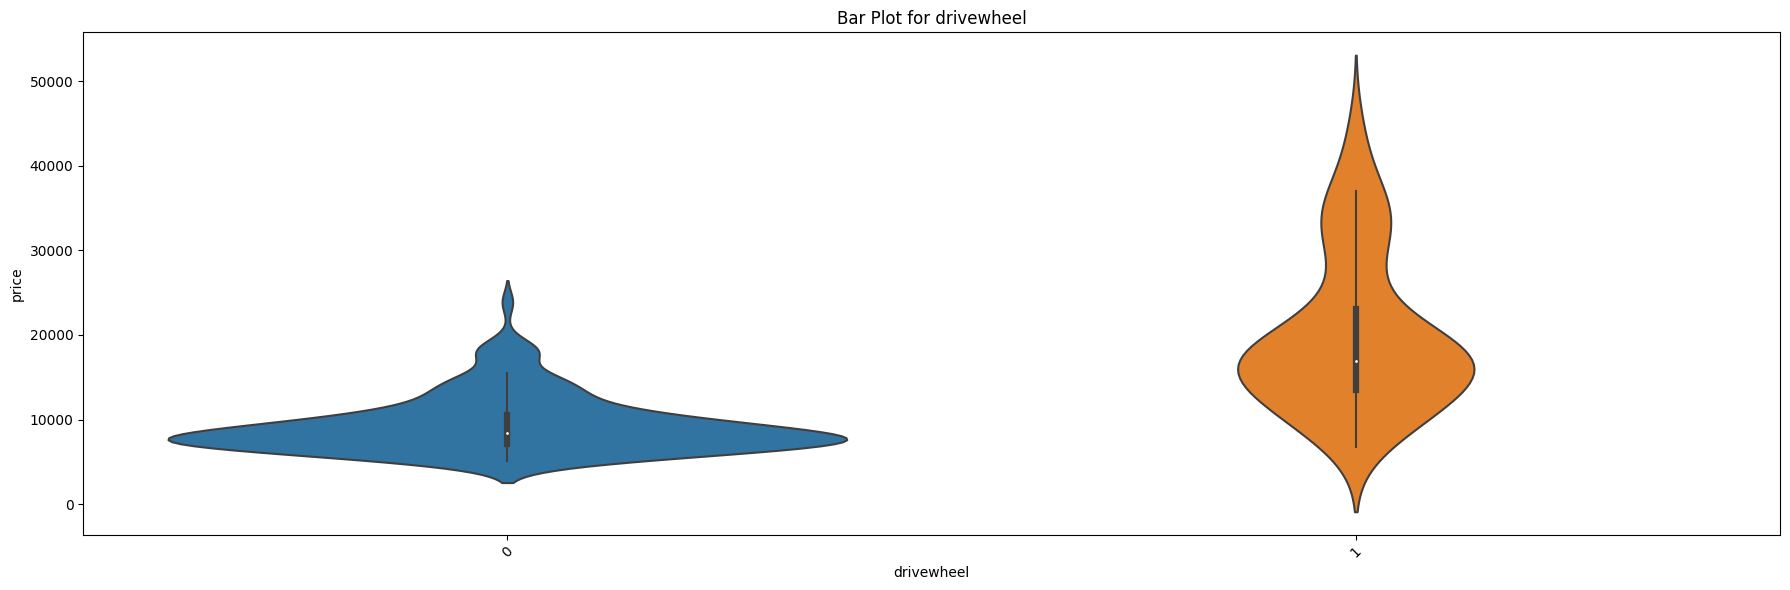

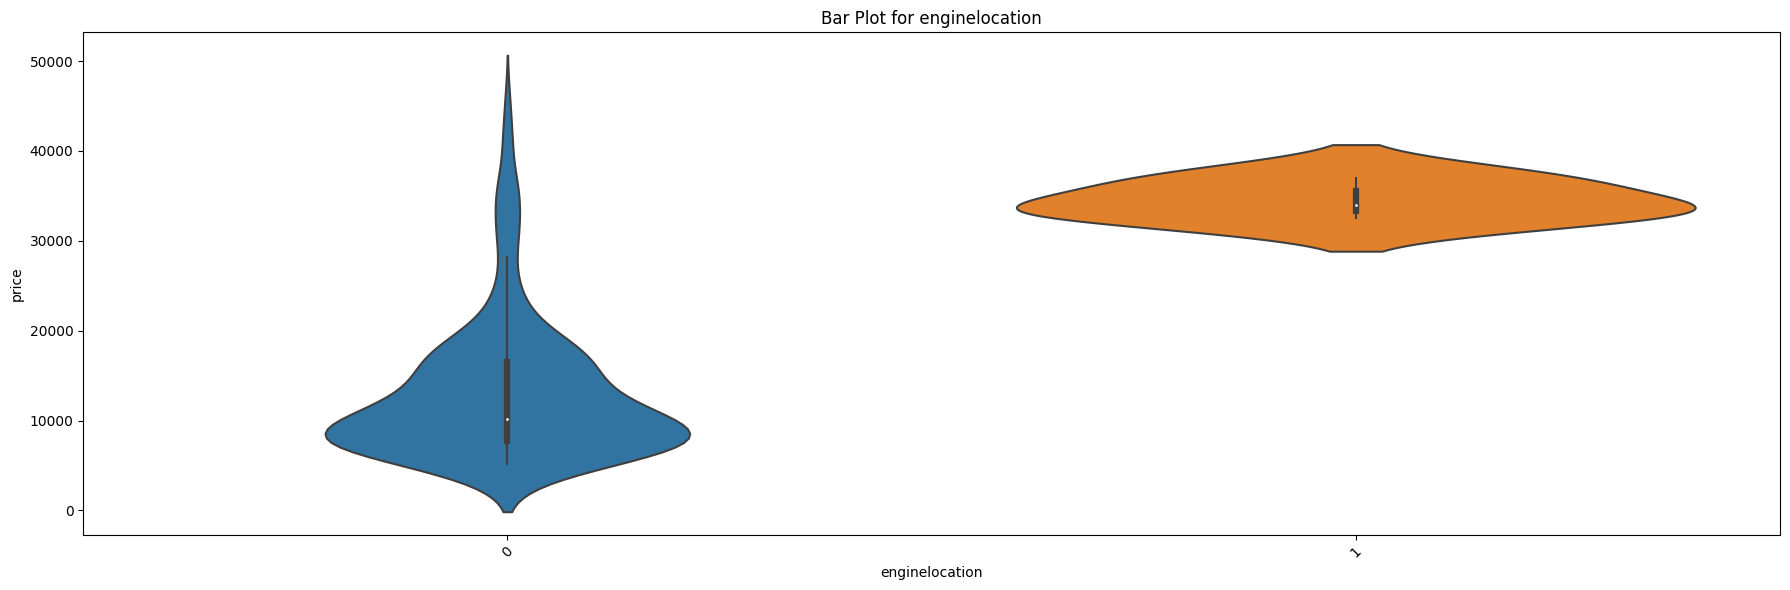

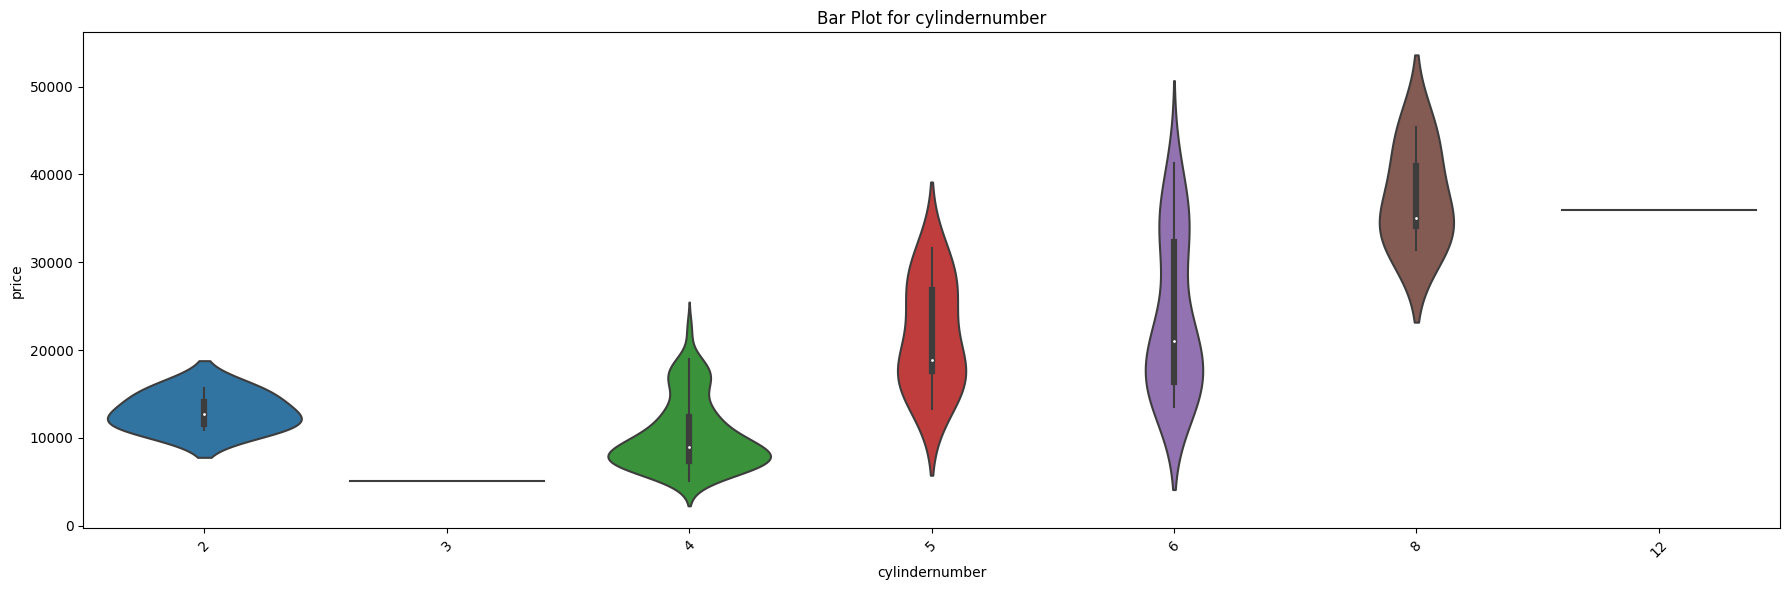

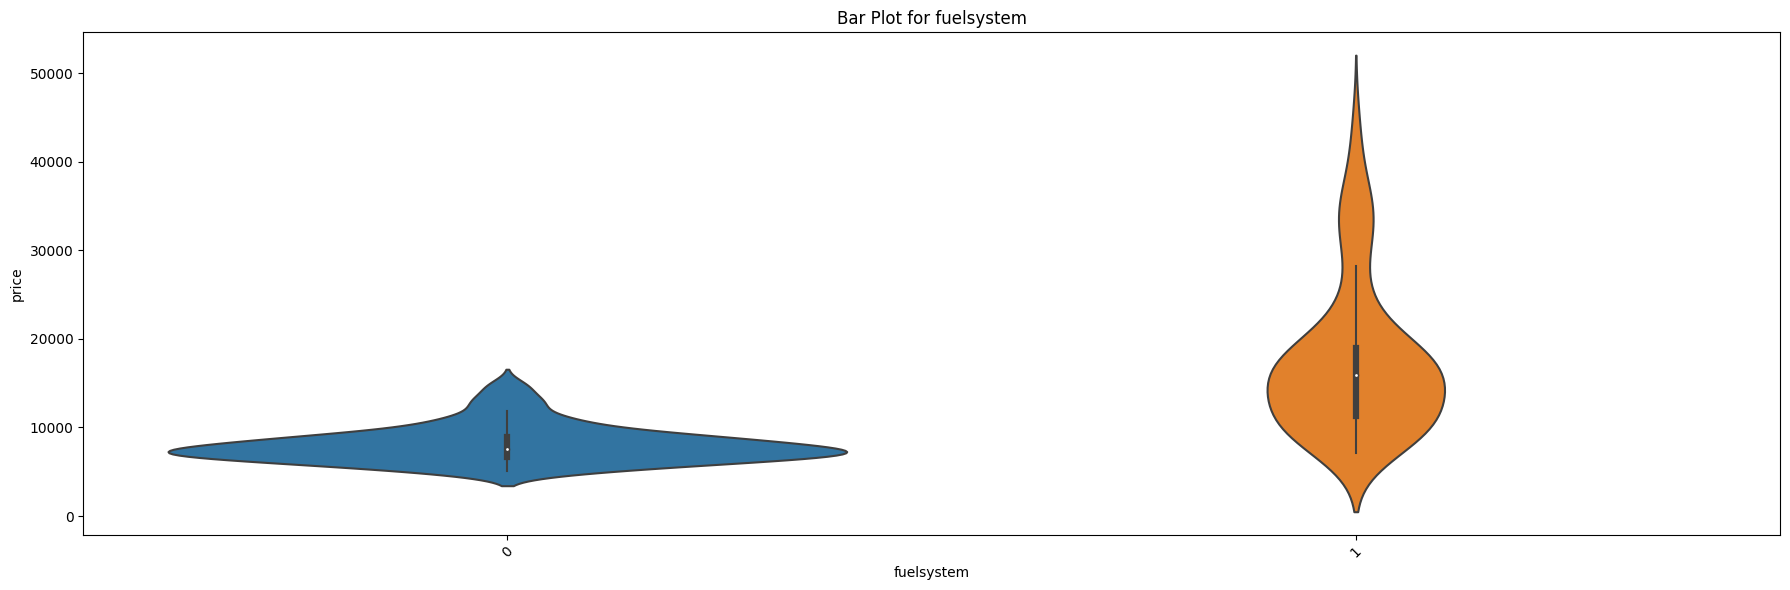

In [460]:
categorical_violin_plot(data.to_pandas(),cat_cols,"price")

Numerical EDA

Univariate Analysis

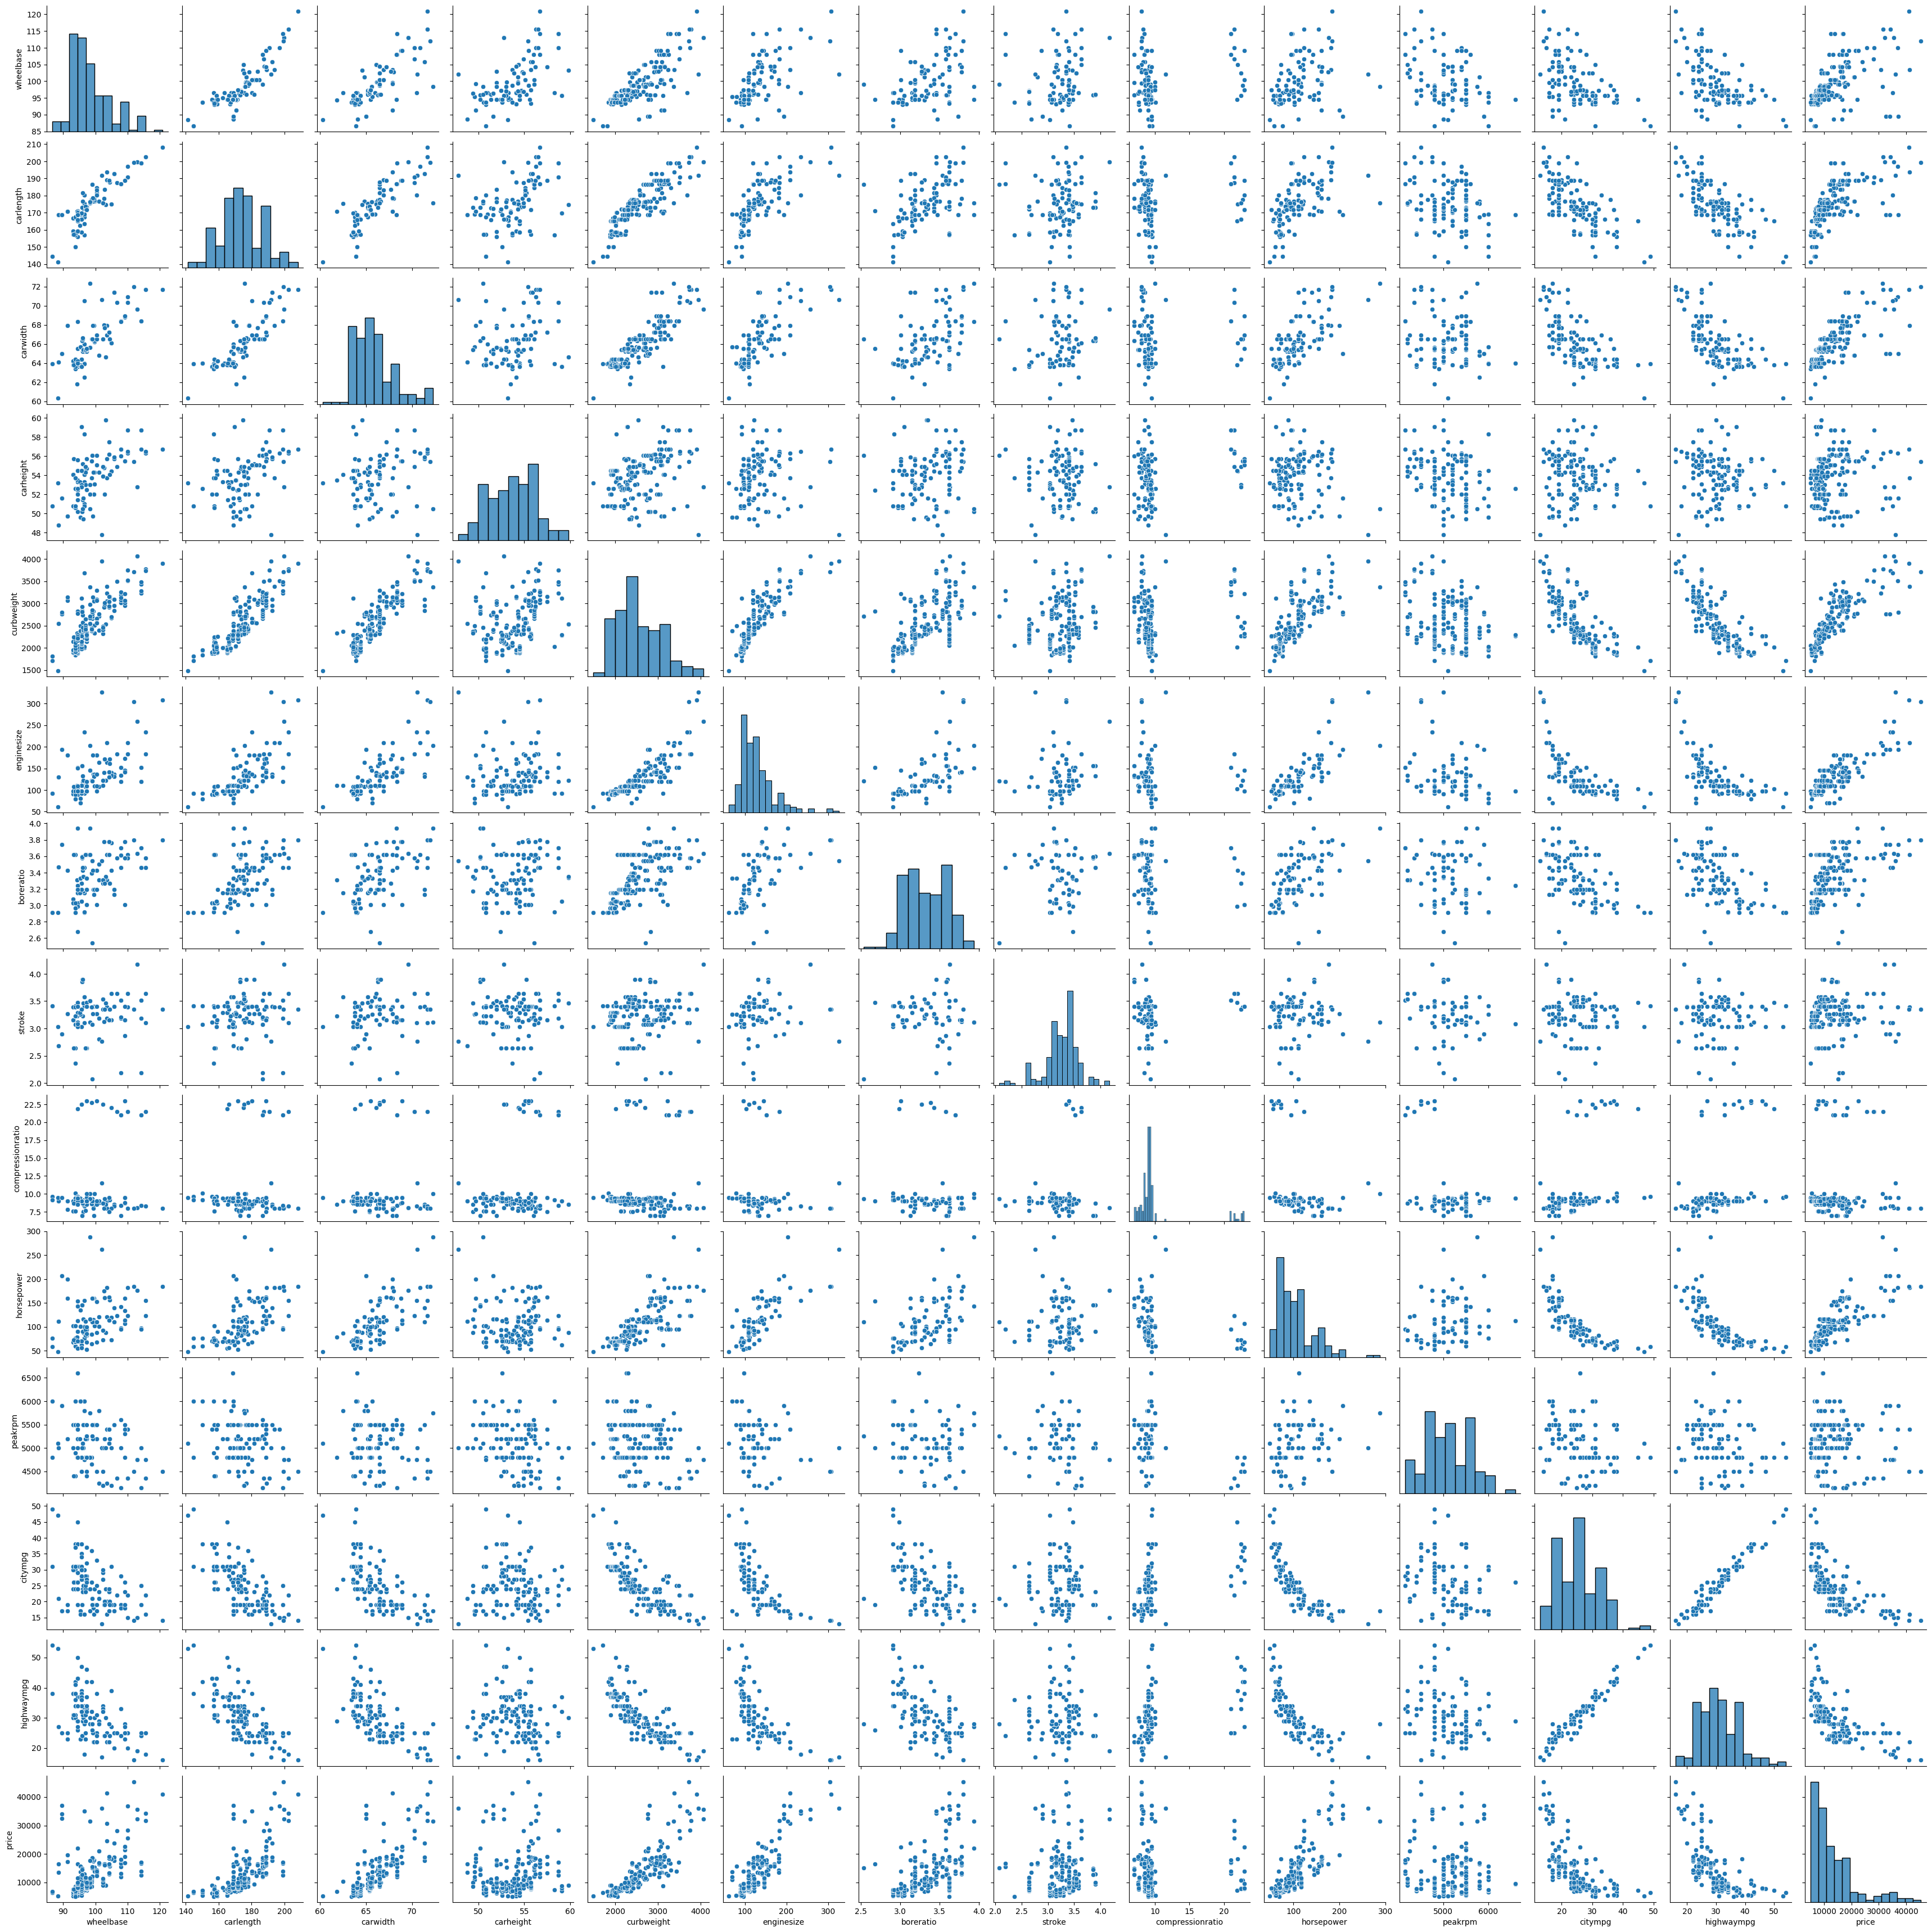

In [461]:
sns.pairplot(data[num_cols].to_pandas(),y_vars=num_cols)

In [462]:
import pandas as pd
from scipy.stats.mstats import winsorize

def winsorize_outliers(df, columns, lower_limit=0.1, upper_limit=0.30):
    
    df_winsorized = df.copy()
    
    for col in columns:
        winsorized_values = winsorize(df[col], limits=(lower_limit, upper_limit))
        df_winsorized[col] = winsorized_values
    
    return df_winsorized

df_winsorized = winsorize_outliers(data.to_pandas(), num_cols)


In [463]:
data=pl.from_pandas(df_winsorized)

Feature engineering

In [464]:
data=data.with_columns(pl.Series(data["horsepower"]/data["highwaympg"]).alias("power_to_milage_ratio"))

In [465]:
data=data.with_columns(pl.Series(data["carlength"]*data["carwidth"]).alias("carsize"))

In [466]:
data=data.with_columns(pl.Series(data["horsepower"]/data["peakrpm"]).alias("efficiency"))

<AxesSubplot: >

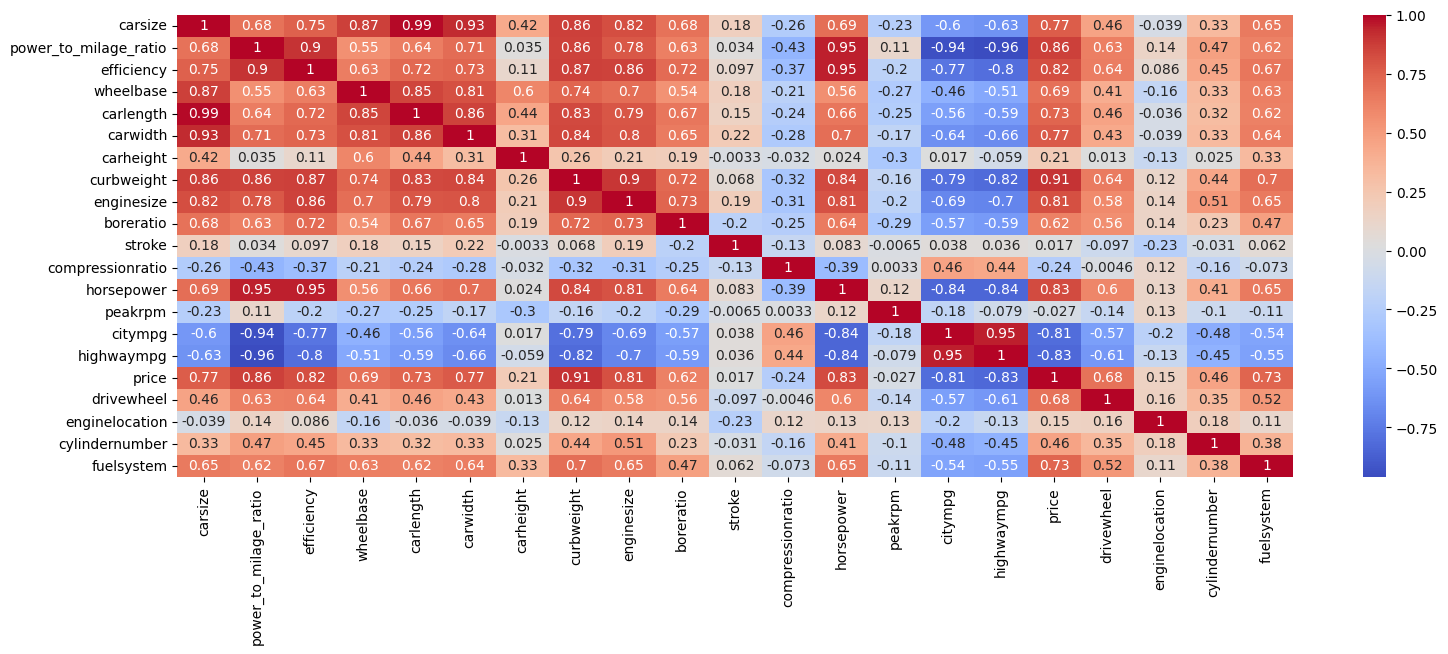

In [467]:
plt.figure(figsize=(18,6))
sns.heatmap(data[["carsize","power_to_milage_ratio","efficiency"]+num_cols+cat_cols].to_pandas().corr(),annot=True,cmap="coolwarm")

In [468]:
num_cols=[col for  col in num_cols if col not in ["carheight",'wheelbase',"boreratio","compressionratio","peakrpm","stroke"]]

In [469]:
data=data.drop(["carheight","wheelbase","boreratio","compressionratio","peakrpm","stroke"])

We can drop wheel_base,population,households

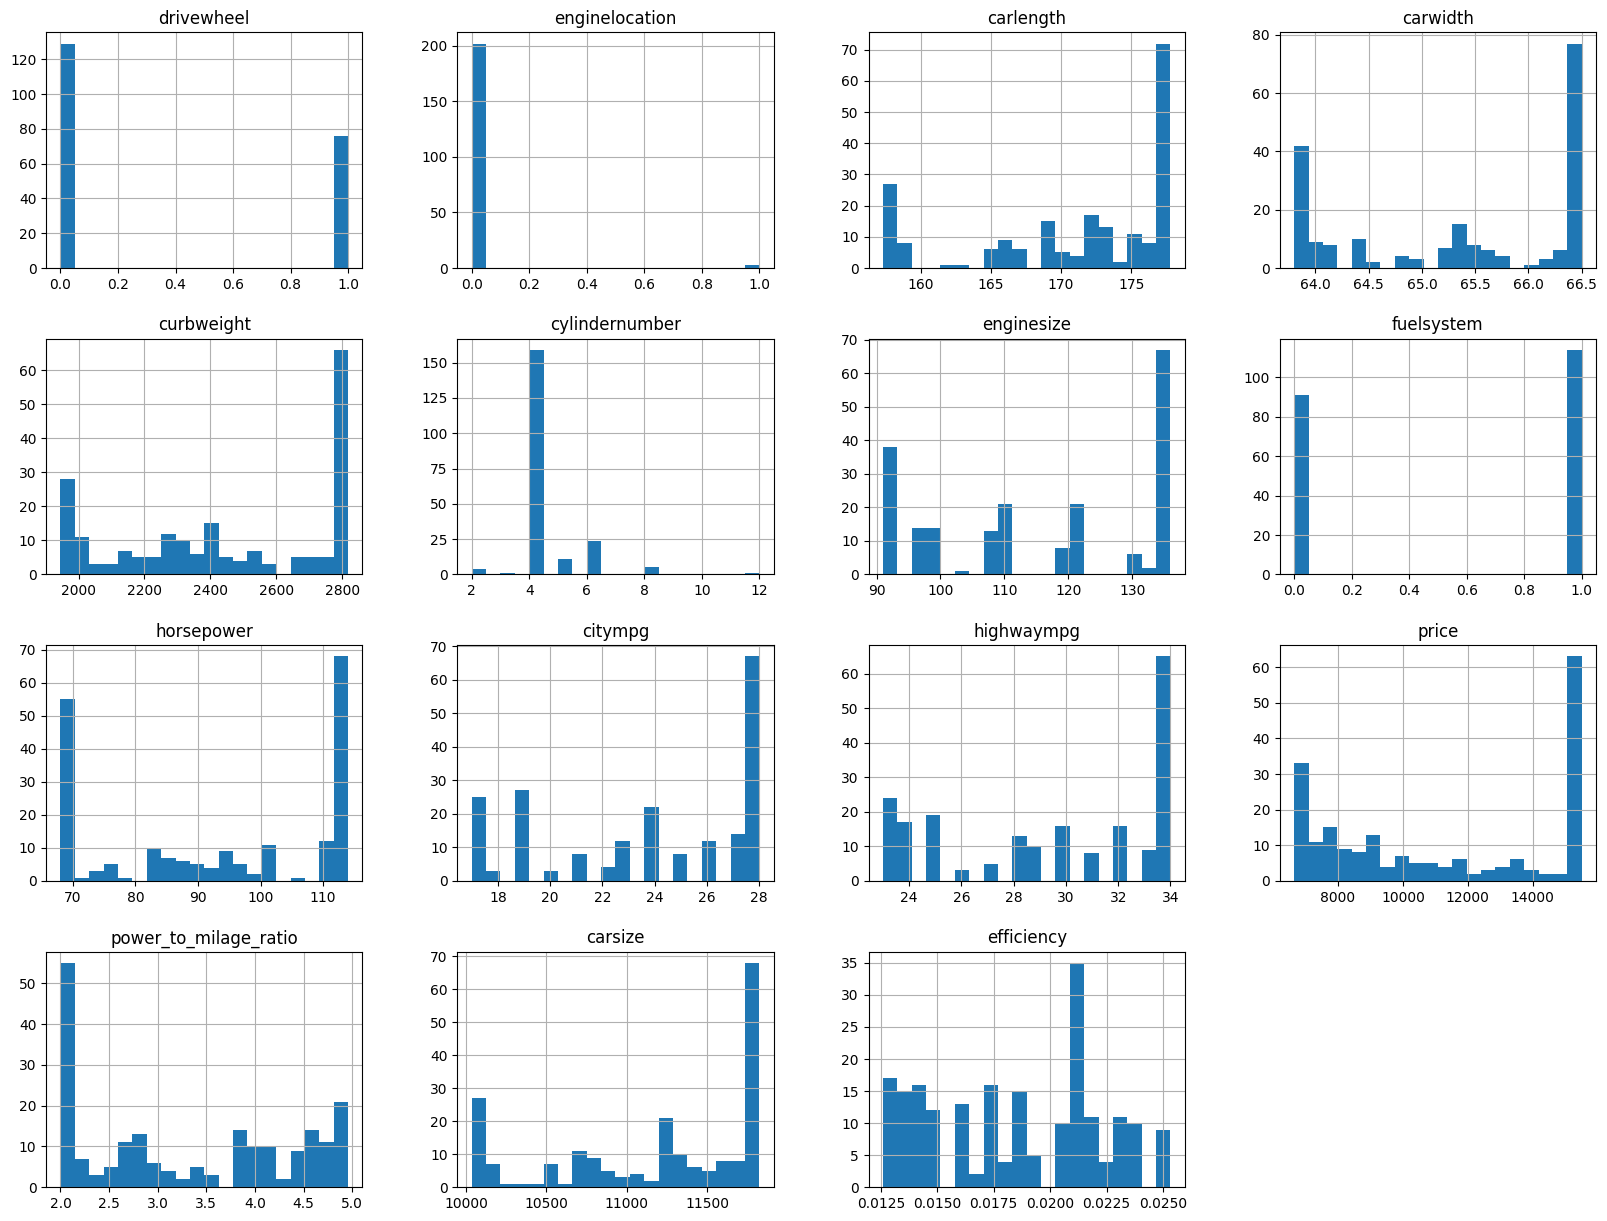

In [470]:
data.to_pandas().hist(bins=20,figsize=(20,15))
plt.show()

In [471]:
corr=data.corr()[-4].transpose(include_header=True,column_names=["corr"])
corr.with_columns(np.abs(corr["corr"])).sort(by="corr",descending=True)

column,corr
str,f64
"""price""",1.0
"""curbweight""",0.906308
"""power_to_milag…",0.864184
"""highwaympg""",0.829892
"""horsepower""",0.826398
…,…
"""carlength""",0.732796
"""fuelsystem""",0.732694
"""drivewheel""",0.679939


In [472]:
data1=data

In [473]:
X=data1.drop("price").to_pandas()
y=data1[["price"]].to_pandas()

In [474]:
from sklearn.preprocessing import StandardScaler
ssx=StandardScaler()
X=ssx.fit_transform(X)

Reducing Multicollinearity

In [475]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X)

PCA()

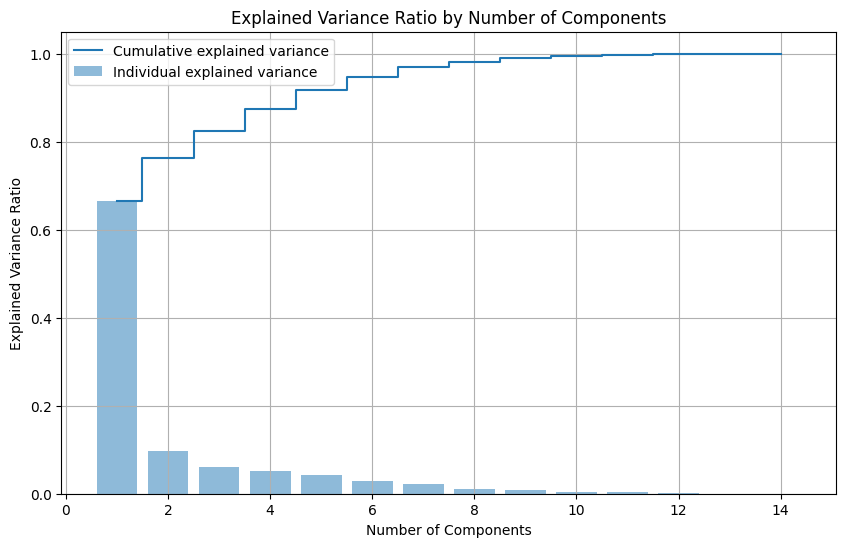

In [476]:
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
     
# Plot explained variance ratio vs. number of components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, where='mid', label='Cumulative explained variance')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Number of Components')
plt.legend(loc='best')
plt.grid()
plt.show()

In [477]:
# pca=PCA(n_components=6)
# X=pca.fit_transform(X)

In [478]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2)

In [479]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [489]:
lr.fit(X_train,Y_train)

LinearRegression()

In [490]:
from sklearn.metrics import r2_score
pred=lr.predict(X_test)

r2_score(Y_test,pred)

0.8595728293886407

In [491]:
score=[]
for i in range(0,100):
    X_train,X_test,Y_train,Y_test = train_test_split(data.drop("price").to_pandas(),data["price"].to_pandas(),test_size=0.2)
    lr=LinearRegression()
    lr.fit(X_train,Y_train)
    pred=lr.predict(X_test)
    # print(r2_score(Y_test,pred))
    score.append(r2_score(Y_test,pred))
print("Average R2 :",np.average(score))

Average R2 : 0.8537745535479746


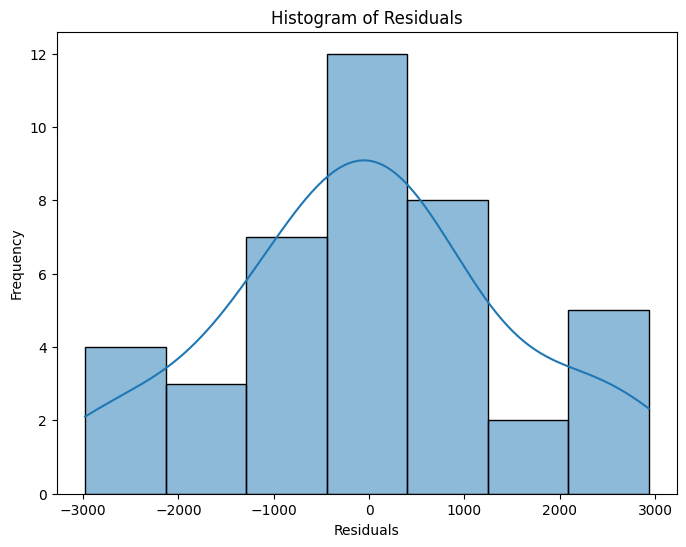

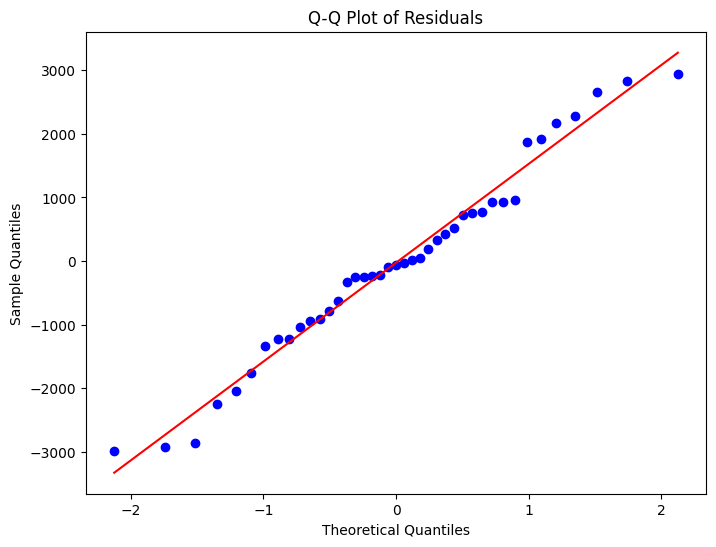

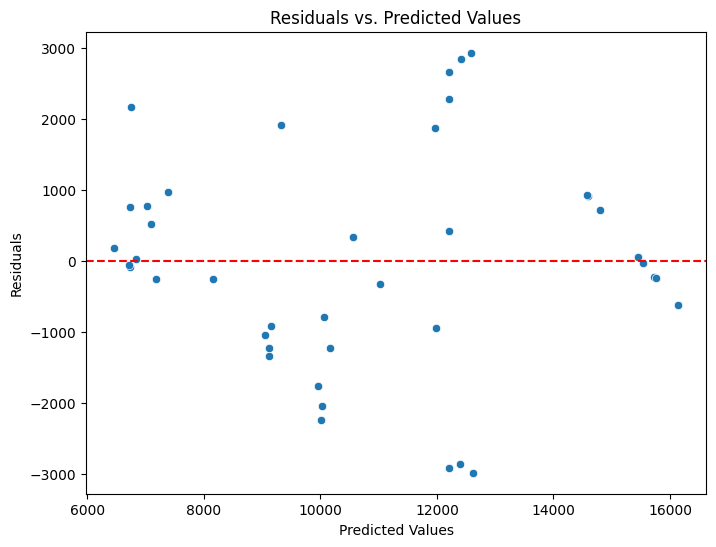

In [492]:
from scipy import stats

residuals = Y_test - pred

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Plot Q-Q plot of residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Plot residuals vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pred, y=residuals)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


Homoscedasticity violated -> variance of residuals changing across the predicted values

In [488]:
#comparision to tree based model
from catboost import CatBoostRegressor
score=[]
for i in range(1,30):
    X_train,X_test,Y_train,Y_test = train_test_split(data.drop("price").to_pandas(),data["price"].to_pandas(),test_size=0.2)
    catboost_classifier = CatBoostRegressor(
        colsample_bylevel=0.9,
        learning_rate=0.05,
        max_depth=5,
        n_estimators=300,
        reg_lambda=0.1,
        subsample=0.9,verbose=False
    )
    catboost_classifier.fit(X_train, Y_train)
    pred=catboost_classifier.predict(X_test)
    # print(r2_score(Y_test,pred))
    score.append(r2_score(Y_test,pred))
print("Average",np.average(score))

Average 0.898433961513331
